# General Information on Variables

In [ ]:
#importing the necessary libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")

In [ ]:
#reading the data set
df = pd.read_csv("https://gist.githubusercontent.com/khikisb/9e4858407b78fb6bd7577bc98866cea7/raw/cb1474ea2f22939addba407a941b9f3a7d4bfd64/diabetes.csv")

## Exploratory Data Analysis

In [ ]:
# To display the top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# To display the bottom 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# total number of rows and columns
# Dataset comprises of 768 observations and 9 characteristics.
# Out of which one is dependent variable and rest 8 are independent variables
df.shape

(768, 9)

In [ ]:
# Data has only float and integer values
# No variable column has null/missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors “Insulin”,”SkinThickness”,”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# Target variable categorical
df.Outcome.unique()

array([1, 0])

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Data Visualization

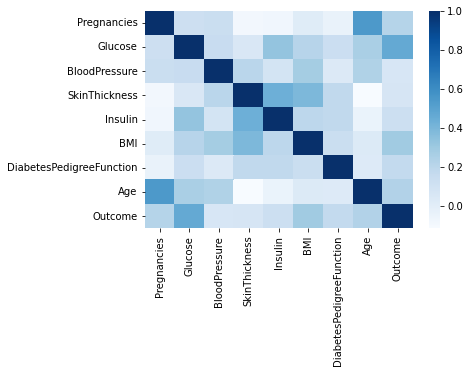

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

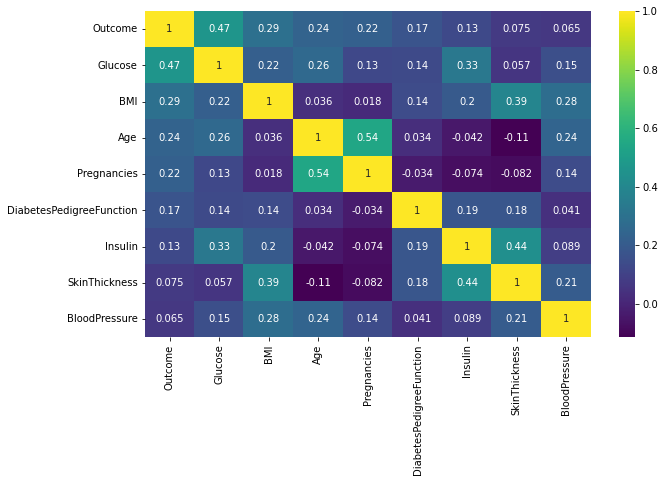

In [ ]:
#Outcome correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effee808100>,
      dtype=object)

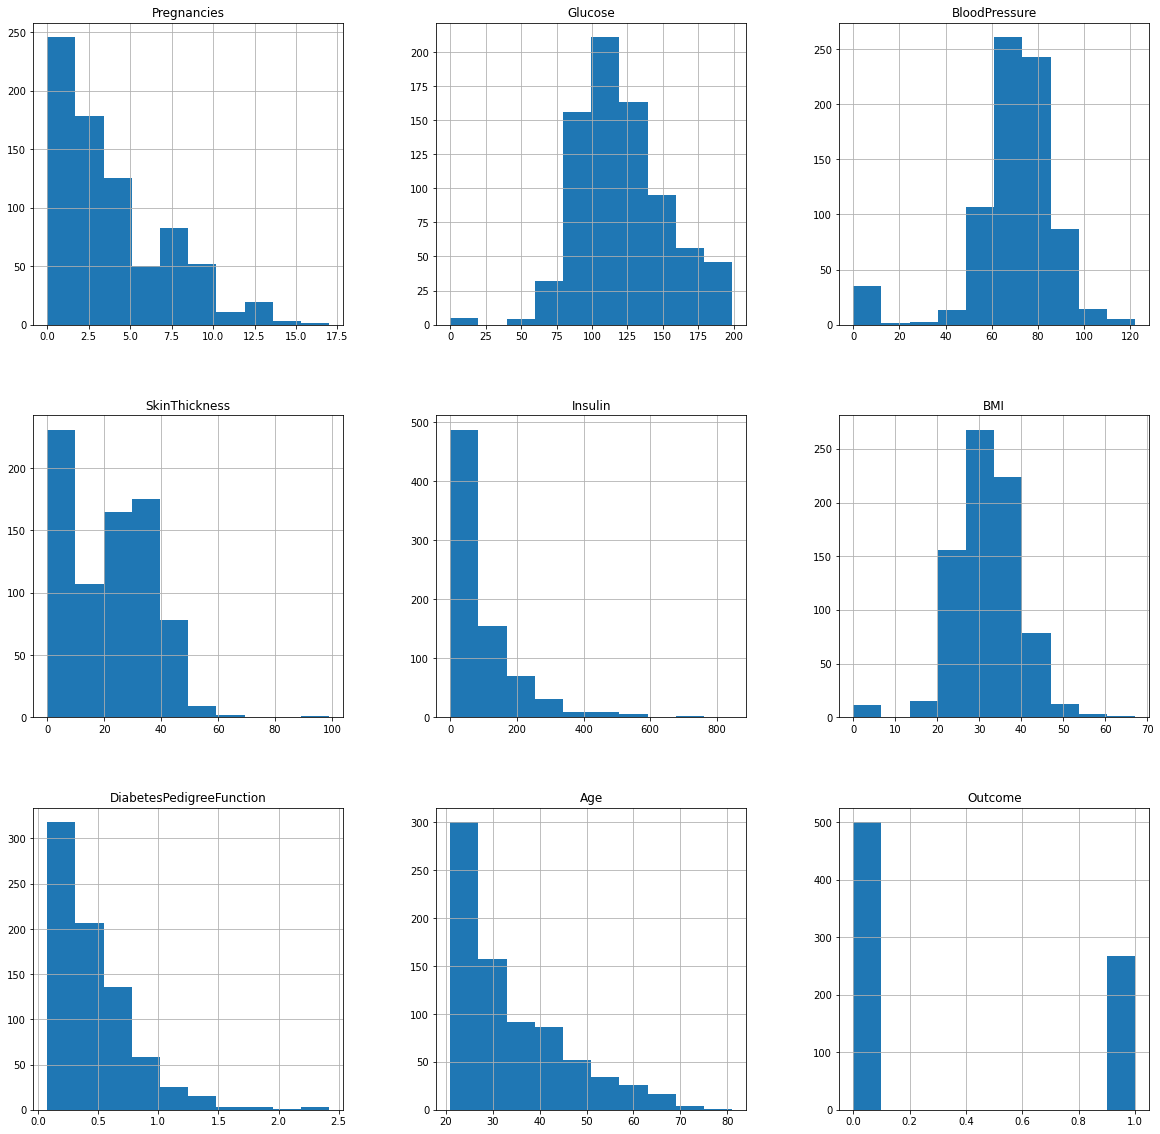

In [ ]:
# see how the data is distributed.
df.hist(figsize = (20,20))

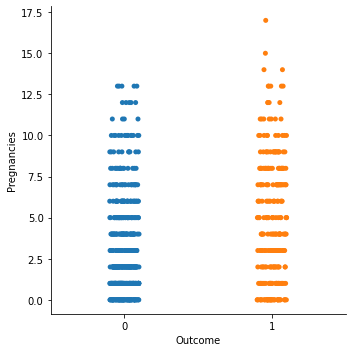

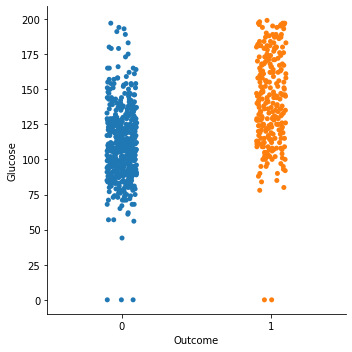

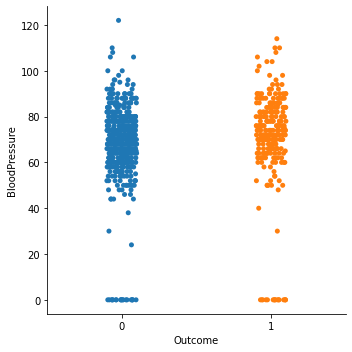

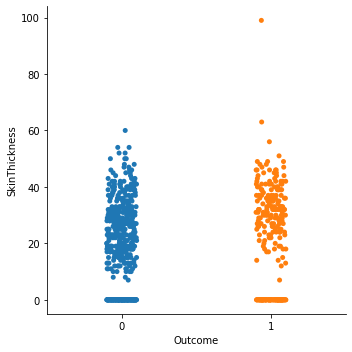

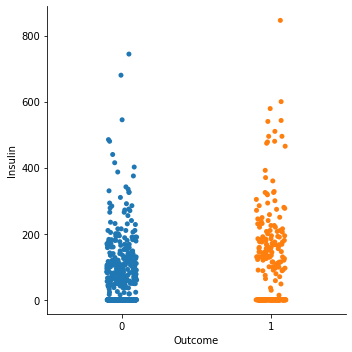

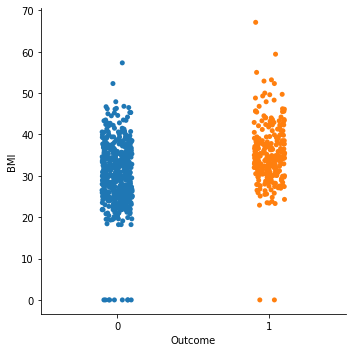

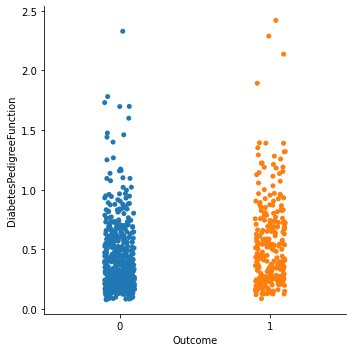

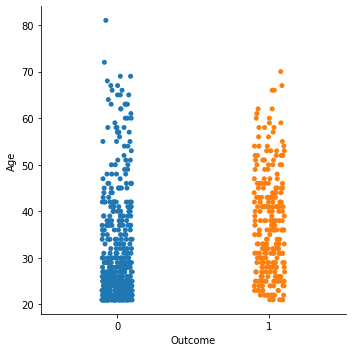

In [ ]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

## DATA PREPROCESSING

In [ ]:
#Observation units for variables with a minimum value of zero are NaN, except for the pregnancy variable.
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [ ]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [ ]:
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes
DiabetesPedigreeFunction yes


In [ ]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df, df.columns)

In [ ]:
for col in df.columns:
    has_outliers(df, col)

In [ ]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.055990,8.671056,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,73.000
Insulin,768.0,138.839844,75.233052,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,424.50000,424.500
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.470082,0.322171,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,1.949
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.000


In [ ]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
X.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.5  33.6   
1            1.0     85.0           66.0           29.0    102.5  26.6   
2            8.0    183.0           64.0           32.0    169.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
5            5.0    116.0           74.0           27.0    102.5  25.6   
6            3.0     78.0           50.0           32.0     88.0  31.0   
7           10.0    115.0           70.0           27.0    102.5  35.3   
8            2.0    197.0           70.0           45.0    424.5  30.5   
9            8.0    125.0           96.0           32.0    169.5  34.3   
10           4.0    110.0           92.0           27.0    102.5  37.6   
11          10.0    168.0           74.0           32.0    169.5  38.0   
12  

In [ ]:
models = [('RF', RandomForestClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.881562 (0.028541)


In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()
# Model Tuning
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(X, y)
rf_cv_model.best_params_
# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [ ]:
# Save Model Using Pickle
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [ ]:
# Save Model Using Pickle
import pickle

filename = 'finalized_model.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))